Plotagem da previsão do CFSv2 para os próximos meses

https://www.cpc.ncep.noaa.gov/products/CFSv2/CFSv2seasonal.shtml


Análise E2 de anomalia de chuva por mês.

https://www.cpc.ncep.noaa.gov/products/CFSv2/htmls/glbPrece2Mon.html

https://www.cpc.ncep.noaa.gov/products/CFSv2/htmls/glbSSTe2Mon.html

In [1]:
import xarray as xr
ds = xr.open_dataset('glbPrecMon.nc')
ds
#arquivo em netCDF

/home/casamentos/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<xarray.Dataset>
Dimensions:  (lon: 384, lat: 190, lev: 1, time: 6, ens: 1)
Coordinates:
  * lon      (lon) float32 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
  * lev      (lev) float32 1.0
  * time     (time) datetime64[ns] 2024-03-01 2024-04-01 ... 2024-08-01
  * ens      (ens) float32 1.0
Data variables:
    anom     (ens, time, lev, lat, lon) float32 ...
Attributes:
    title:    CPC CFSv2 Climate Forecast Monitoring
    summary:  coverted from binary format for image glbPrecMon.gif
    history:  created: 2024-02-12 21:45:53.644480

In [2]:
#ajustar as coordenadas da longitude 
ds.coords['lon'] = ((ds.coords['lon'] + 180) % 360) - 180
ds = ds.sortby(ds.lon)
ds

<xarray.Dataset>
Dimensions:  (lat: 190, lev: 1, time: 6, ens: 1, lon: 384)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
  * lev      (lev) float32 1.0
  * time     (time) datetime64[ns] 2024-03-01 2024-04-01 ... 2024-08-01
  * ens      (ens) float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1
Data variables:
    anom     (ens, time, lev, lat, lon) float32 ...
Attributes:
    title:    CPC CFSv2 Climate Forecast Monitoring
    summary:  coverted from binary format for image glbPrecMon.gif
    history:  created: 2024-02-12 21:45:53.644480

In [3]:
#datas presentes no arquivo, são seis meses
ds.time.data

array(['2024-03-01T00:00:00.000000000', '2024-04-01T00:00:00.000000000',
       '2024-05-01T00:00:00.000000000', '2024-06-01T00:00:00.000000000',
       '2024-07-01T00:00:00.000000000', '2024-08-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [4]:
lista_data= list(ds.time.data)
lista_data

[numpy.datetime64('2024-03-01T00:00:00.000000000'),
 numpy.datetime64('2024-04-01T00:00:00.000000000'),
 numpy.datetime64('2024-05-01T00:00:00.000000000'),
 numpy.datetime64('2024-06-01T00:00:00.000000000'),
 numpy.datetime64('2024-07-01T00:00:00.000000000'),
 numpy.datetime64('2024-08-01T00:00:00.000000000')]

In [6]:
lista_data= ds.time.dt.strftime('%d-%m-%Y')
lista_data= list(lista_data.data)
print(lista_data)

['01-03-2024', '01-04-2024', '01-05-2024', '01-06-2024', '01-07-2024', '01-08-2024']


In [7]:

for i in range(len(lista_data)):
    print(i)
    
    
for i, data in enumerate(lista_data):
    print(i,data)

0
1
2
3
4
5
0 01-03-2024
1 01-04-2024
2 01-05-2024
3 01-06-2024
4 01-07-2024
5 01-08-2024


In [8]:
import calendar

import datetime

for data in lista_data:
    # Convertendo a string da data para um objeto datetime
    dt = datetime.datetime.strptime(data, '%d-%m-%Y')
    
    # Obtendo o número de dias no mês usando o módulo calendar
    dias_no_mes = calendar.monthrange(dt.year, dt.month)[1]
    
    # Imprimindo o resultado
    print(f'O mês de {dt.strftime("%B %Y")} tem {dias_no_mes} dias.')

O mês de March 2024 tem 31 dias.
O mês de April 2024 tem 30 dias.
O mês de May 2024 tem 31 dias.
O mês de June 2024 tem 30 dias.
O mês de July 2024 tem 31 dias.
O mês de August 2024 tem 31 dias.


O mês de March 2024 tem 31 dias.


<xarray.DataArray 'anom' (lat: 190, lon: 384)>
array([[ 0.46461317,  0.46407726,  0.47300577, ...,  0.48764712,
         0.47121963,  0.47135383],
       [ 0.32140782,  0.3573878 ,  0.34037974, ...,  0.32310405,
         0.3307377 ,  0.3185509 ],
       [-0.2001212 , -0.20293356, -0.18824688, ..., -0.10490384,
        -0.16021286, -0.16315933],
       ...,
       [-1.5207951 , -1.5416429 , -1.5520439 , ..., -1.577131  ,
        -1.5765052 , -1.5775329 ],
       [-1.4926723 , -1.498386  , -1.4848157 , ..., -1.5044577 ,
        -1.4921372 , -1.4944139 ],
       [-1.6404309 , -1.6210569 , -1.6448499 , ..., -1.6470817 ,
        -1.6386454 , -1.6386452 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
    lev      float32 1.0
    time     datetime64[ns] 2024-03-01
    ens      float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1

array('2024-03-01T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
01-03-2024


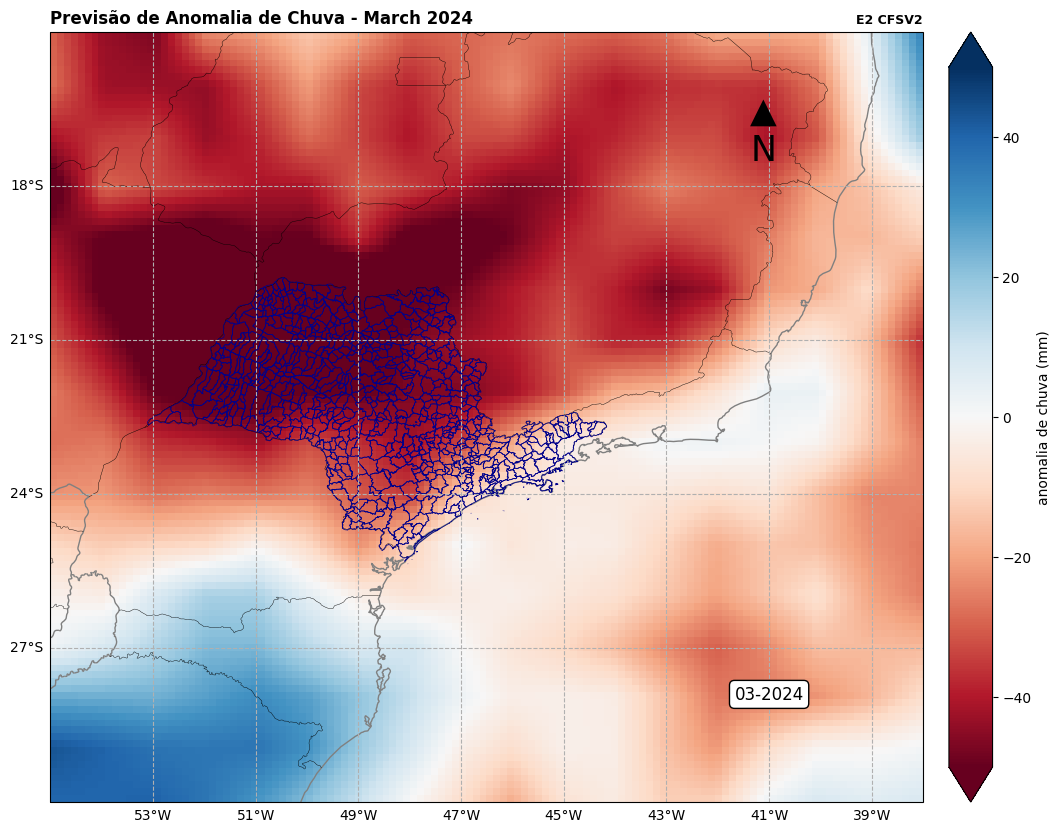

O mês de April 2024 tem 30 dias.


<xarray.DataArray 'anom' (lat: 190, lon: 384)>
array([[ 0.99001443,  0.9977902 ,  0.99273616, ...,  0.96690226,
         0.9755856 ,  0.983448  ],
       [ 0.37303194,  0.37177894,  0.39117622, ...,  0.3747601 ,
         0.35367864,  0.3572208 ],
       [ 0.1220832 ,  0.14554058,  0.13763532, ...,  0.09940326,
         0.13283998,  0.1252798 ],
       ...,
       [-0.3833139 , -0.4086718 , -0.3631398 , ..., -0.32909778,
        -0.3592945 , -0.37726587],
       [-0.41441748, -0.43696827, -0.44349056, ..., -0.36011547,
        -0.3660763 , -0.39165118],
       [-0.7260198 , -0.72813624, -0.7299508 , ..., -0.70567256,
        -0.71379447, -0.71124554]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
    lev      float32 1.0
    time     datetime64[ns] 2024-04-01
    ens      float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1

array('2024-04-01T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
01-04-2024


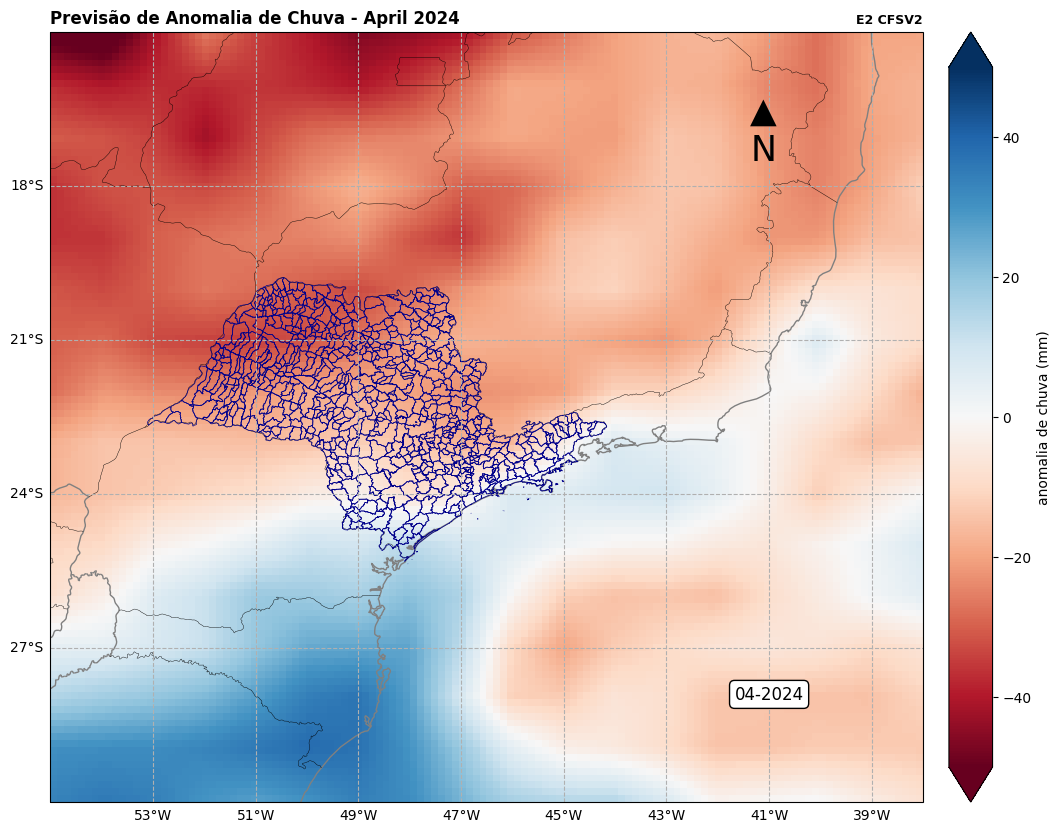

O mês de May 2024 tem 31 dias.


<xarray.DataArray 'anom' (lat: 190, lon: 384)>
array([[ 0.2516361 ,  0.24346651,  0.23833294, ...,  0.27337548,
         0.27676788,  0.2562335 ],
       [-0.0746828 , -0.03972962, -0.03888128, ..., -0.06977233,
        -0.08124491, -0.06856716],
       [-0.32154173, -0.35136133, -0.3626107 , ..., -0.32274738,
        -0.3503792 , -0.3321663 ],
       ...,
       [ 1.7494864 ,  1.7601094 ,  1.7742606 , ...,  1.8108218 ,
         1.7996175 ,  1.783145  ],
       [ 2.2547212 ,  2.2170904 ,  2.2442746 , ...,  2.2490077 ,
         2.2776222 ,  2.236732  ],
       [ 1.5819532 ,  1.5783372 ,  1.6213245 , ...,  1.5782919 ,
         1.5852559 ,  1.5886937 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
    lev      float32 1.0
    time     datetime64[ns] 2024-05-01
    ens      float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1

array('2024-05-01T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
01-05-2024


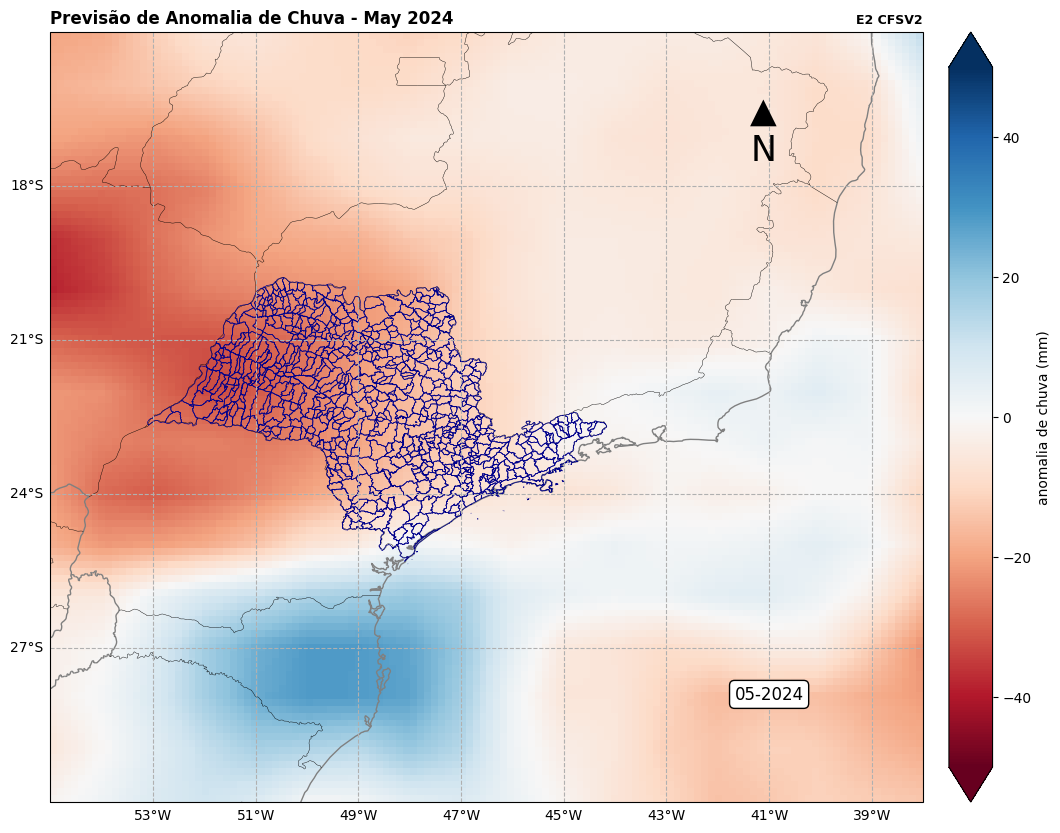

O mês de June 2024 tem 30 dias.


<xarray.DataArray 'anom' (lat: 190, lon: 384)>
array([[ 0.45791996,  0.4631039 ,  0.4877279 , ...,  0.43403035,
         0.4351968 ,  0.43748653],
       [ 0.22222093,  0.23453271,  0.24200645, ...,  0.2275344 ,
         0.22775047,  0.23885283],
       [-0.07240307, -0.06536177, -0.0597455 , ..., -0.03775671,
        -0.06216469, -0.05387034],
       ...,
       [-1.2729309 , -1.2856328 , -1.2562994 , ..., -1.1661842 ,
        -1.1962094 , -1.2394961 ],
       [-0.95929974, -0.9446112 , -0.948629  , ..., -0.8837862 ,
        -0.9167481 , -0.9350648 ],
       [-0.71966887, -0.7123245 , -0.70126534, ..., -0.7254573 ,
        -0.7125839 , -0.7264511 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
    lev      float32 1.0
    time     datetime64[ns] 2024-06-01
    ens      float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1

array('2024-06-01T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
01-06-2024


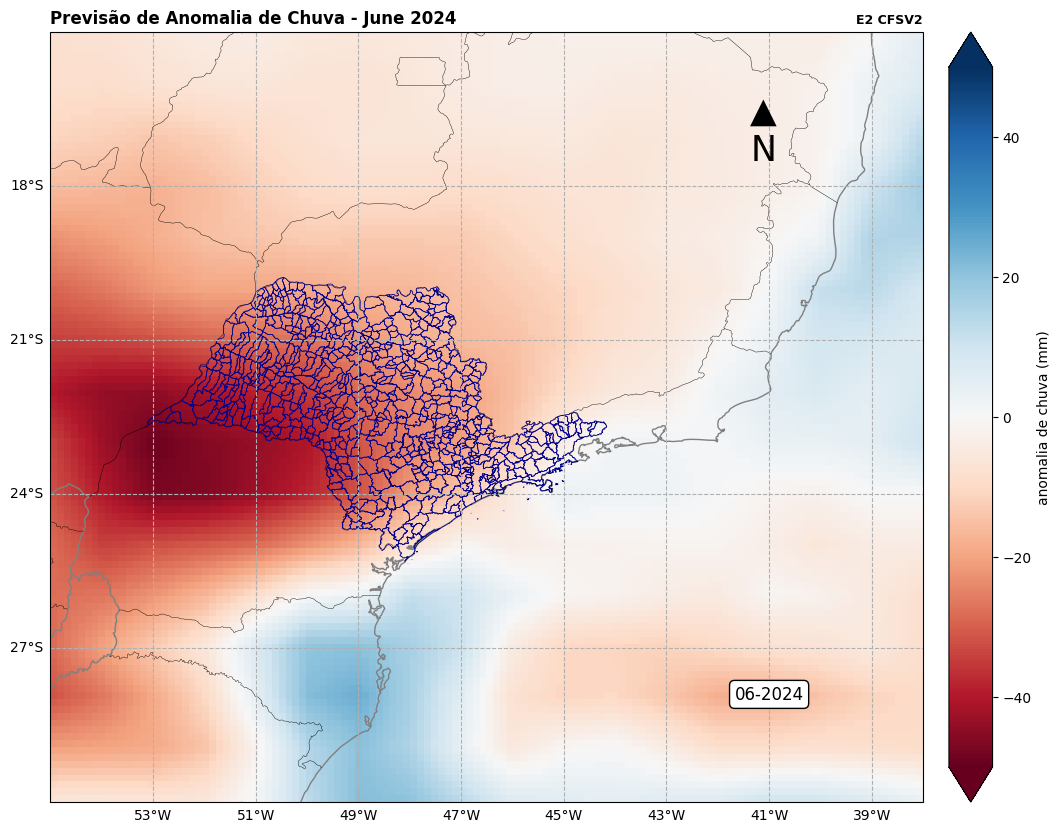

O mês de July 2024 tem 31 dias.


<xarray.DataArray 'anom' (lat: 190, lon: 384)>
array([[ 2.7136651e-01,  2.6511735e-01,  2.8011602e-01, ...,
         2.6288518e-01,  2.5002846e-01,  2.7565205e-01],
       [ 1.1289451e-01,  1.0535030e-01,  1.0874304e-01, ...,
         1.2226909e-01,  1.5168677e-01,  1.3820536e-01],
       [ 2.0089271e-03, -2.3525309e-02, -1.2499029e-02, ...,
         3.8167100e-02, -2.9060595e-02,  1.3302722e-02],
       ...,
       [ 3.9024756e+00,  3.9126058e+00,  3.8778327e+00, ...,
         3.7044942e+00,  3.8148463e+00,  3.8263619e+00],
       [ 3.4224596e+00,  3.3883553e+00,  3.3817899e+00, ...,
         3.3248336e+00,  3.3463926e+00,  3.3786211e+00],
       [ 1.9572408e+00,  1.9268826e+00,  1.8757707e+00, ...,
         1.9263952e+00,  1.9315274e+00,  1.9131823e+00]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
    lev      float32 1.0
    time     datetime64[ns] 2024-07-01
    ens      float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1

array('2024-07-01T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
01-07-2024


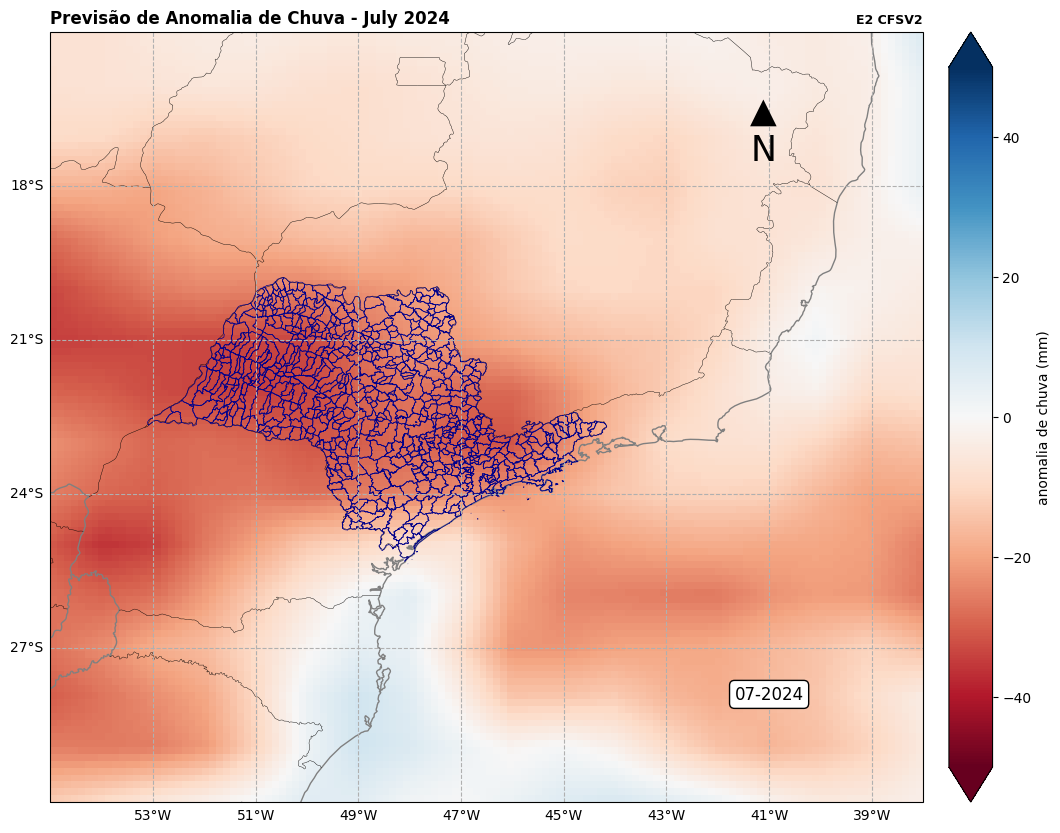

O mês de August 2024 tem 31 dias.


<xarray.DataArray 'anom' (lat: 190, lon: 384)>
array([[0.2281553 , 0.2547157 , 0.23940456, ..., 0.22619101, 0.2076652 ,
        0.20619209],
       [0.02834667, 0.0685669 , 0.07195962, ..., 0.02816795, 0.04446151,
        0.03294428],
       [0.01490985, 0.01138316, 0.00607104, ..., 0.0088835 , 0.00361585,
        0.03749752],
       ...,
       [1.9385798 , 1.9318421 , 1.9301424 , ..., 1.9967059 , 1.9621038 ,
        1.9501886 ],
       [2.5614433 , 2.586175  , 2.59372   , ..., 2.6655002 , 2.5959513 ,
        2.5883603 ],
       [2.8678503 , 2.8734756 , 2.9017818 , ..., 2.8595488 , 2.8350425 ,
        2.8603504 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
    lev      float32 1.0
    time     datetime64[ns] 2024-08-01
    ens      float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1

array('2024-08-01T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
01-08-2024


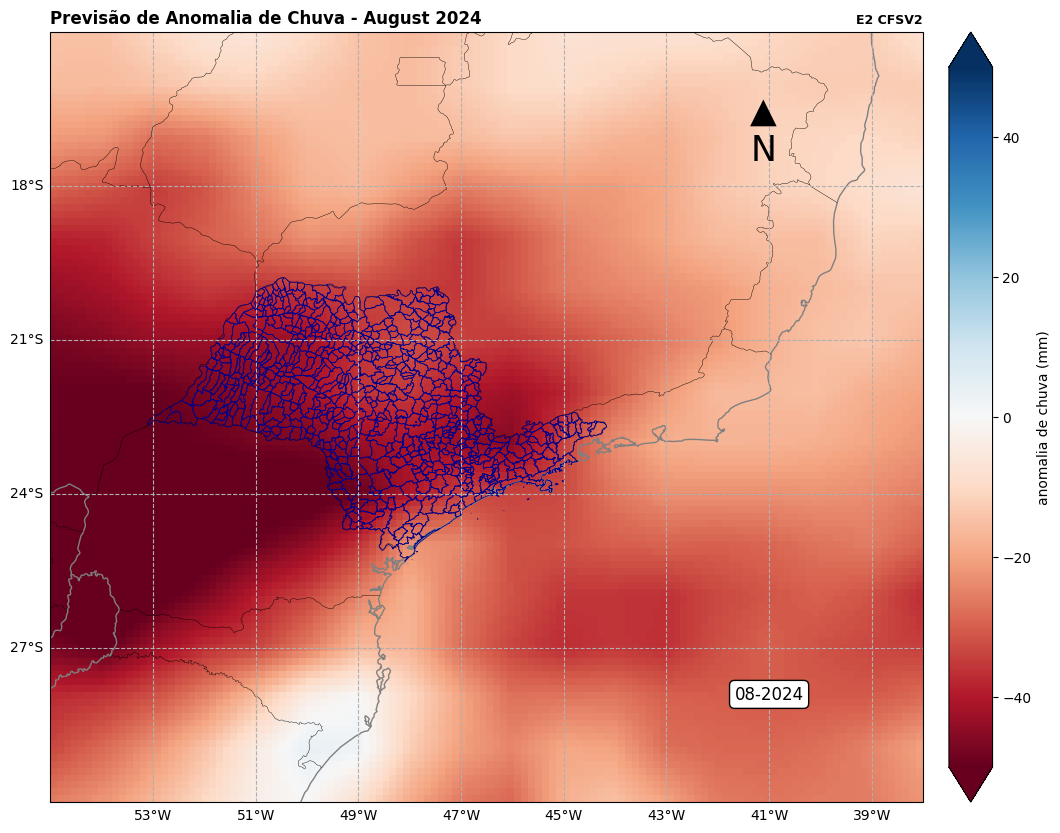

In [9]:
import calendar

import datetime

#for data in lista_data:
for i, data in enumerate(lista_data):
    
    
    # Convertendo a string da data para um objeto datetime
    dt = datetime.datetime.strptime(data, '%d-%m-%Y')
    
    # Obtendo o número de dias no mês usando o módulo calendar
    dias_no_mes = calendar.monthrange(dt.year, dt.month)[1]
    
    # Imprimindo o resultado
    print(f'O mês de {dt.strftime("%B %Y")} tem {dias_no_mes} dias.')
    
    #multiplicar os dias do mês do ano, para saber o volume exato acima da média
    anom= ds['anom']*dias_no_mes

    mes = anom.isel(ens=0, time=i, lev=0)
    display(mes)
    
    #preencher a data bonita no texto
    display(mes.time.data)
    tempo = mes.time.dt.strftime('%d-%m-%Y')
    tempo2 = mes.time.dt.strftime('%m-%Y')

    tempo
    print('data do cfsv2')
    print(tempo.data)
    
    #selecionar o mapa para ficar dentro da área de interesse, no caso o estado de São Paulo
    anom_corte_SP = mes.sel(lat = slice(-30, -15), lon = slice(-55,-38))
    anom_corte_SP
    
    import numpy as np


    #interpolando os dados, para não ficar de forma quadrática os resultados no mapa.
    # Assuming 'lat' and 'lon' are the dimension names, replace them with your actual dimension names
    new_lon = np.linspace(anom_corte_SP.lon[0], anom_corte_SP.lon[-1], anom_corte_SP.sizes["lon"] * 7)
    new_lat = np.linspace(anom_corte_SP.lat[0], anom_corte_SP.lat[-1], anom_corte_SP.sizes["lat"] * 7)


    # Use dimension names instead of string indices
    NEW_anom_corte_SP = anom_corte_SP.interp(lat=new_lat, lon=new_lon)

    #Mapa de interesse
    
    
    import numpy as np
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature
    import cartopy.io.shapereader as shpreader  # Import shapefiles

    # Assume NEW_anom_corte_SP é o seu dado de anomalia de chuva

    # Configura o tamanho do plot
    fig = plt.figure(figsize=(15, 10))

    # Define a projeção
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Adiciona linha de costa, terra, borda
    ax.coastlines(resolution='10m', color='grey')
    ax.add_feature(cartopy.feature.LAND, facecolor='silver')
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='gray')

    # Define a área do plot
    limites = [-55, -38, -30, -15]
    ax.set_extent(limites, crs=ccrs.PlateCarree())

    # Adicionando o dado (assuming NEW_anom_corte_SP is the rainfall anomaly data)
    im = ax.imshow(NEW_anom_corte_SP, origin='lower', extent=limites, vmin=-50, vmax=50, cmap='RdBu')

    # Adicionando título
    plt.title(f'Previsão de Anomalia de Chuva - {dt.strftime("%B %Y")}', fontweight='bold', loc='left')
    plt.title('E2 CFSV2', fontweight='bold', fontsize=9, loc='right')

    # Adicionando os limites dos estados
    shapefile_path = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces_lines')
    shapefile = shpreader.Reader(shapefile_path).geometries()
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

    shapefile = list(shpreader.Reader('SP_municipios/SP_Municipios_2022.shp').geometries())
    #ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.3)
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='darkblue',facecolor='none', linewidth=0.5)

    # Configuração das grades
    gl = ax.gridlines(linestyle='--', xlocs=np.arange(-55, -38, 2), ylocs=np.arange(-30, -15, 3), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

    # Adicionando a barra de cor
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes

    axins = inset_axes(ax, width="5%", height="100%", loc='right', borderpad=-5)
    cbar = fig.colorbar(im, cax=axins, orientation='vertical', label='anomalia de chuva (mm)', extend='both')
    
    # North Arrow
    ax.annotate(u'\u25B2 \nN ', ha='center', fontsize=25, xy=(-41, -17.5))
    
    # Data box
    box = dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    ax.annotate(tempo2.data, ha='center', fontsize=12, xy=(-41, -28), bbox=box)

    plt.savefig(f'Figura_gfsv2_nc/anomalia_csf{i}.png',bbox_inches='tight', dpi=100)
    # Mostra o plot
    plt.show()
    

O mês de March 2024 tem 31 dias.


<xarray.DataArray 'anom' (lat: 190, lon: 384)>
array([[ 0.46461317,  0.46407726,  0.47300577, ...,  0.48764712,
         0.47121963,  0.47135383],
       [ 0.32140782,  0.3573878 ,  0.34037974, ...,  0.32310405,
         0.3307377 ,  0.3185509 ],
       [-0.2001212 , -0.20293356, -0.18824688, ..., -0.10490384,
        -0.16021286, -0.16315933],
       ...,
       [-1.5207951 , -1.5416429 , -1.5520439 , ..., -1.577131  ,
        -1.5765052 , -1.5775329 ],
       [-1.4926723 , -1.498386  , -1.4848157 , ..., -1.5044577 ,
        -1.4921372 , -1.4944139 ],
       [-1.6404309 , -1.6210569 , -1.6448499 , ..., -1.6470817 ,
        -1.6386454 , -1.6386452 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
    lev      float32 1.0
    time     datetime64[ns] 2024-03-01
    ens      float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1

array('2024-03-01T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
01-03-2024


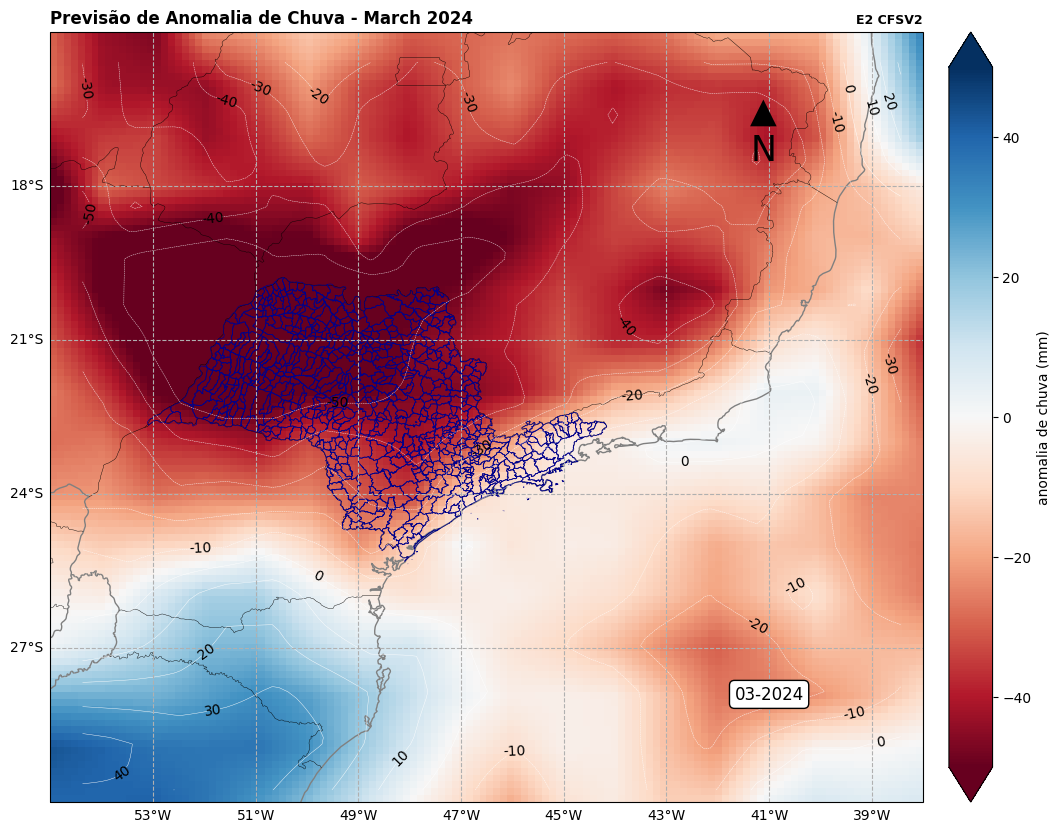

O mês de April 2024 tem 30 dias.


<xarray.DataArray 'anom' (lat: 190, lon: 384)>
array([[ 0.99001443,  0.9977902 ,  0.99273616, ...,  0.96690226,
         0.9755856 ,  0.983448  ],
       [ 0.37303194,  0.37177894,  0.39117622, ...,  0.3747601 ,
         0.35367864,  0.3572208 ],
       [ 0.1220832 ,  0.14554058,  0.13763532, ...,  0.09940326,
         0.13283998,  0.1252798 ],
       ...,
       [-0.3833139 , -0.4086718 , -0.3631398 , ..., -0.32909778,
        -0.3592945 , -0.37726587],
       [-0.41441748, -0.43696827, -0.44349056, ..., -0.36011547,
        -0.3660763 , -0.39165118],
       [-0.7260198 , -0.72813624, -0.7299508 , ..., -0.70567256,
        -0.71379447, -0.71124554]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
    lev      float32 1.0
    time     datetime64[ns] 2024-04-01
    ens      float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1

array('2024-04-01T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
01-04-2024


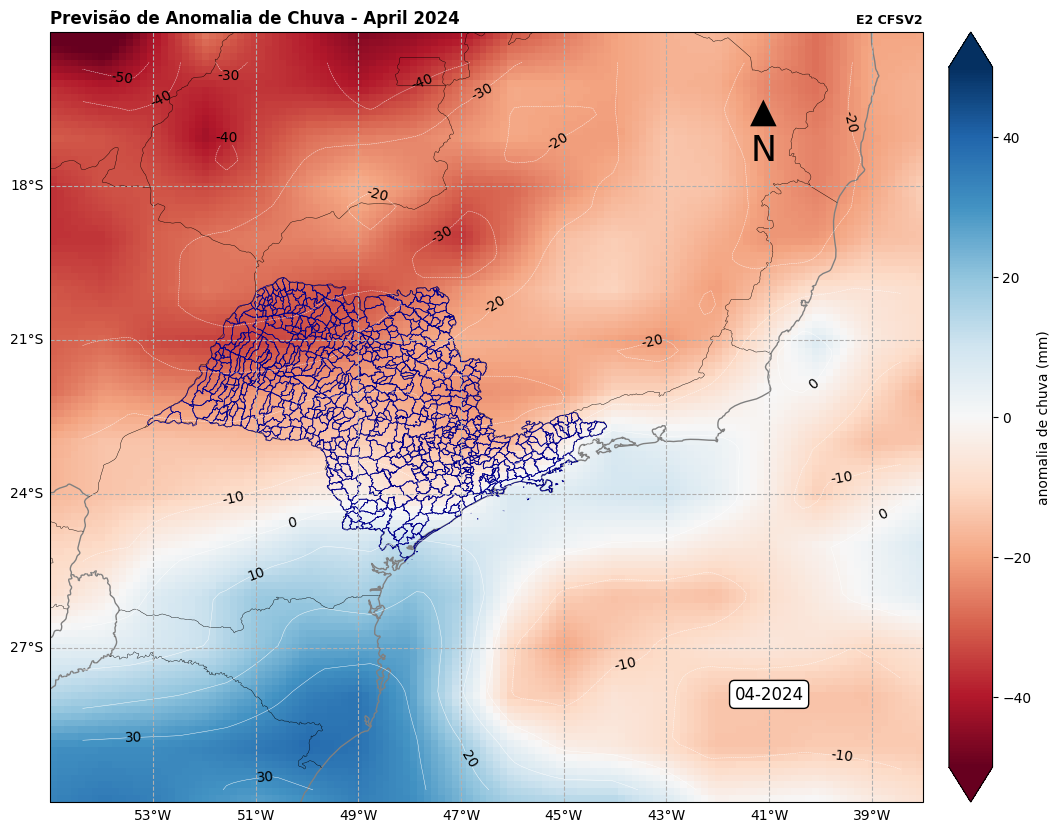

O mês de May 2024 tem 31 dias.


<xarray.DataArray 'anom' (lat: 190, lon: 384)>
array([[ 0.2516361 ,  0.24346651,  0.23833294, ...,  0.27337548,
         0.27676788,  0.2562335 ],
       [-0.0746828 , -0.03972962, -0.03888128, ..., -0.06977233,
        -0.08124491, -0.06856716],
       [-0.32154173, -0.35136133, -0.3626107 , ..., -0.32274738,
        -0.3503792 , -0.3321663 ],
       ...,
       [ 1.7494864 ,  1.7601094 ,  1.7742606 , ...,  1.8108218 ,
         1.7996175 ,  1.783145  ],
       [ 2.2547212 ,  2.2170904 ,  2.2442746 , ...,  2.2490077 ,
         2.2776222 ,  2.236732  ],
       [ 1.5819532 ,  1.5783372 ,  1.6213245 , ...,  1.5782919 ,
         1.5852559 ,  1.5886937 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
    lev      float32 1.0
    time     datetime64[ns] 2024-05-01
    ens      float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1

array('2024-05-01T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
01-05-2024


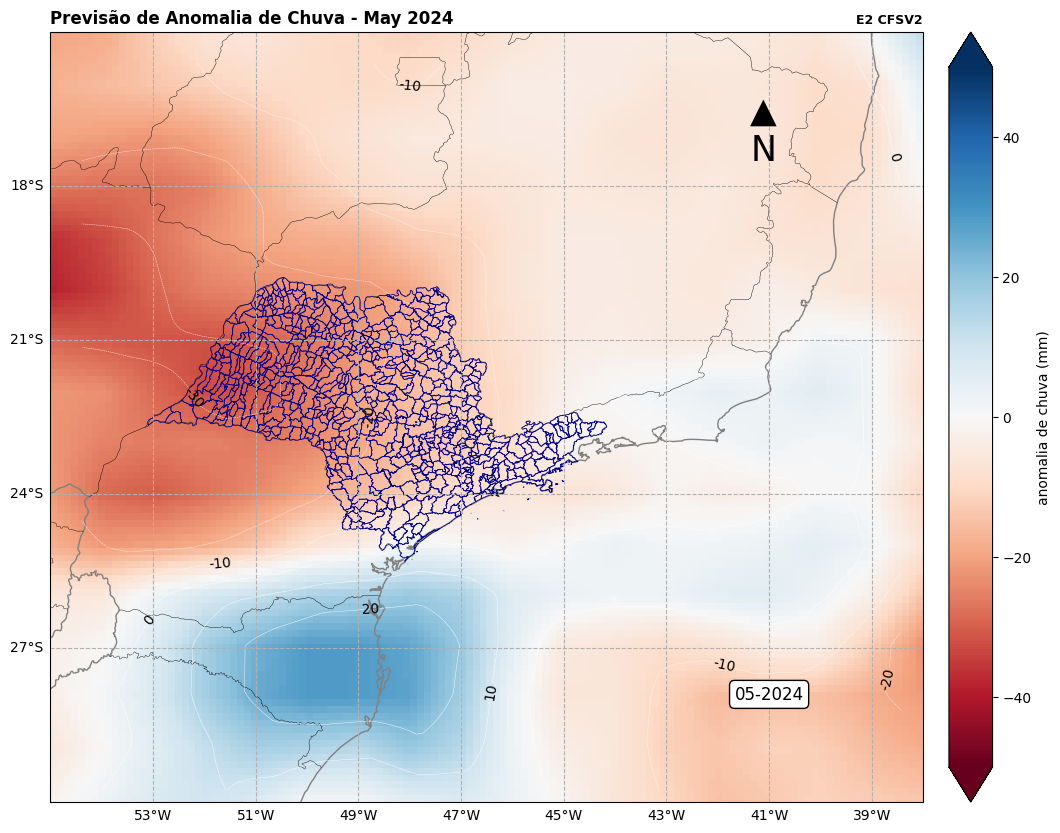

O mês de June 2024 tem 30 dias.


<xarray.DataArray 'anom' (lat: 190, lon: 384)>
array([[ 0.45791996,  0.4631039 ,  0.4877279 , ...,  0.43403035,
         0.4351968 ,  0.43748653],
       [ 0.22222093,  0.23453271,  0.24200645, ...,  0.2275344 ,
         0.22775047,  0.23885283],
       [-0.07240307, -0.06536177, -0.0597455 , ..., -0.03775671,
        -0.06216469, -0.05387034],
       ...,
       [-1.2729309 , -1.2856328 , -1.2562994 , ..., -1.1661842 ,
        -1.1962094 , -1.2394961 ],
       [-0.95929974, -0.9446112 , -0.948629  , ..., -0.8837862 ,
        -0.9167481 , -0.9350648 ],
       [-0.71966887, -0.7123245 , -0.70126534, ..., -0.7254573 ,
        -0.7125839 , -0.7264511 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
    lev      float32 1.0
    time     datetime64[ns] 2024-06-01
    ens      float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1

array('2024-06-01T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
01-06-2024


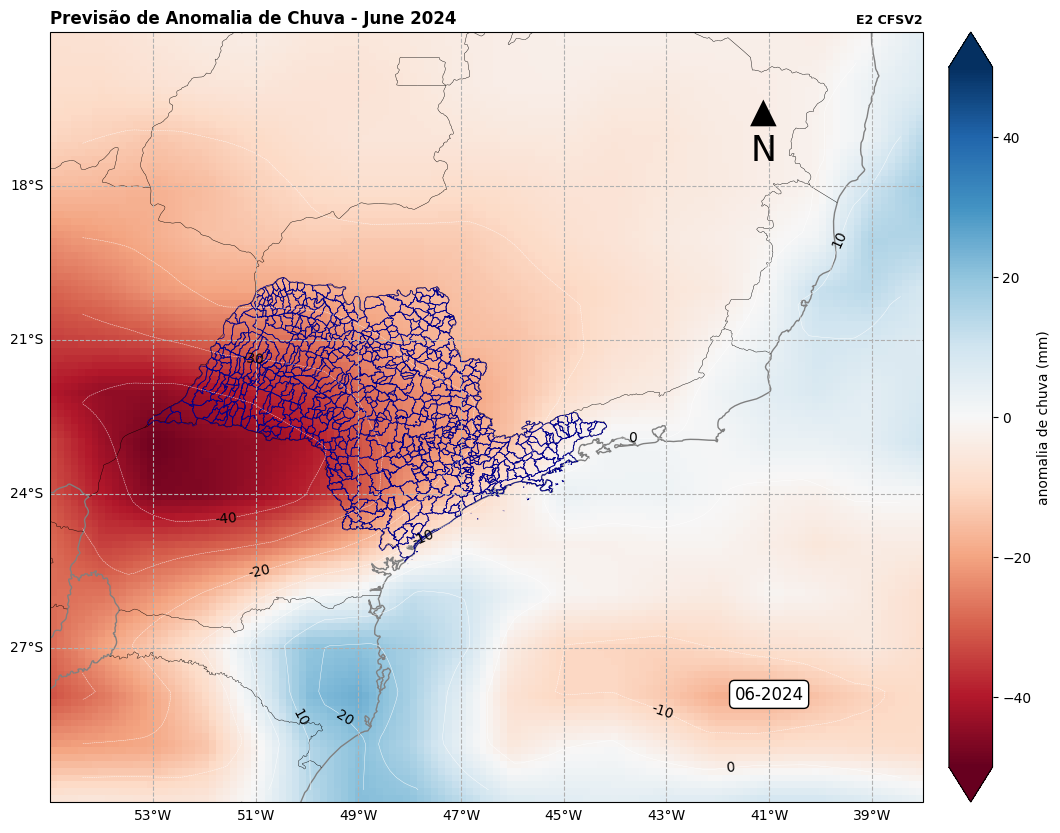

O mês de July 2024 tem 31 dias.


<xarray.DataArray 'anom' (lat: 190, lon: 384)>
array([[ 2.7136651e-01,  2.6511735e-01,  2.8011602e-01, ...,
         2.6288518e-01,  2.5002846e-01,  2.7565205e-01],
       [ 1.1289451e-01,  1.0535030e-01,  1.0874304e-01, ...,
         1.2226909e-01,  1.5168677e-01,  1.3820536e-01],
       [ 2.0089271e-03, -2.3525309e-02, -1.2499029e-02, ...,
         3.8167100e-02, -2.9060595e-02,  1.3302722e-02],
       ...,
       [ 3.9024756e+00,  3.9126058e+00,  3.8778327e+00, ...,
         3.7044942e+00,  3.8148463e+00,  3.8263619e+00],
       [ 3.4224596e+00,  3.3883553e+00,  3.3817899e+00, ...,
         3.3248336e+00,  3.3463926e+00,  3.3786211e+00],
       [ 1.9572408e+00,  1.9268826e+00,  1.8757707e+00, ...,
         1.9263952e+00,  1.9315274e+00,  1.9131823e+00]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
    lev      float32 1.0
    time     datetime64[ns] 2024-07-01
    ens      float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1

array('2024-07-01T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
01-07-2024


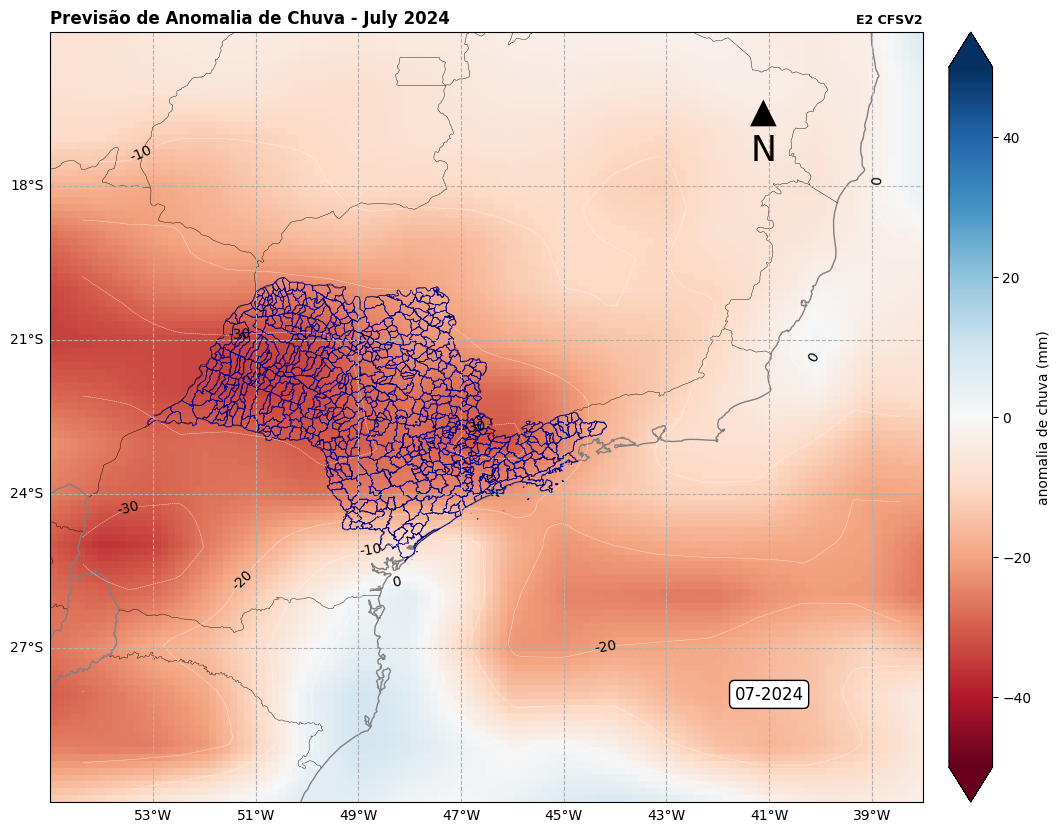

O mês de August 2024 tem 31 dias.


<xarray.DataArray 'anom' (lat: 190, lon: 384)>
array([[0.2281553 , 0.2547157 , 0.23940456, ..., 0.22619101, 0.2076652 ,
        0.20619209],
       [0.02834667, 0.0685669 , 0.07195962, ..., 0.02816795, 0.04446151,
        0.03294428],
       [0.01490985, 0.01138316, 0.00607104, ..., 0.0088835 , 0.00361585,
        0.03749752],
       ...,
       [1.9385798 , 1.9318421 , 1.9301424 , ..., 1.9967059 , 1.9621038 ,
        1.9501886 ],
       [2.5614433 , 2.586175  , 2.59372   , ..., 2.6655002 , 2.5959513 ,
        2.5883603 ],
       [2.8678503 , 2.8734756 , 2.9017818 , ..., 2.8595488 , 2.8350425 ,
        2.8603504 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
    lev      float32 1.0
    time     datetime64[ns] 2024-08-01
    ens      float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1

array('2024-08-01T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
01-08-2024


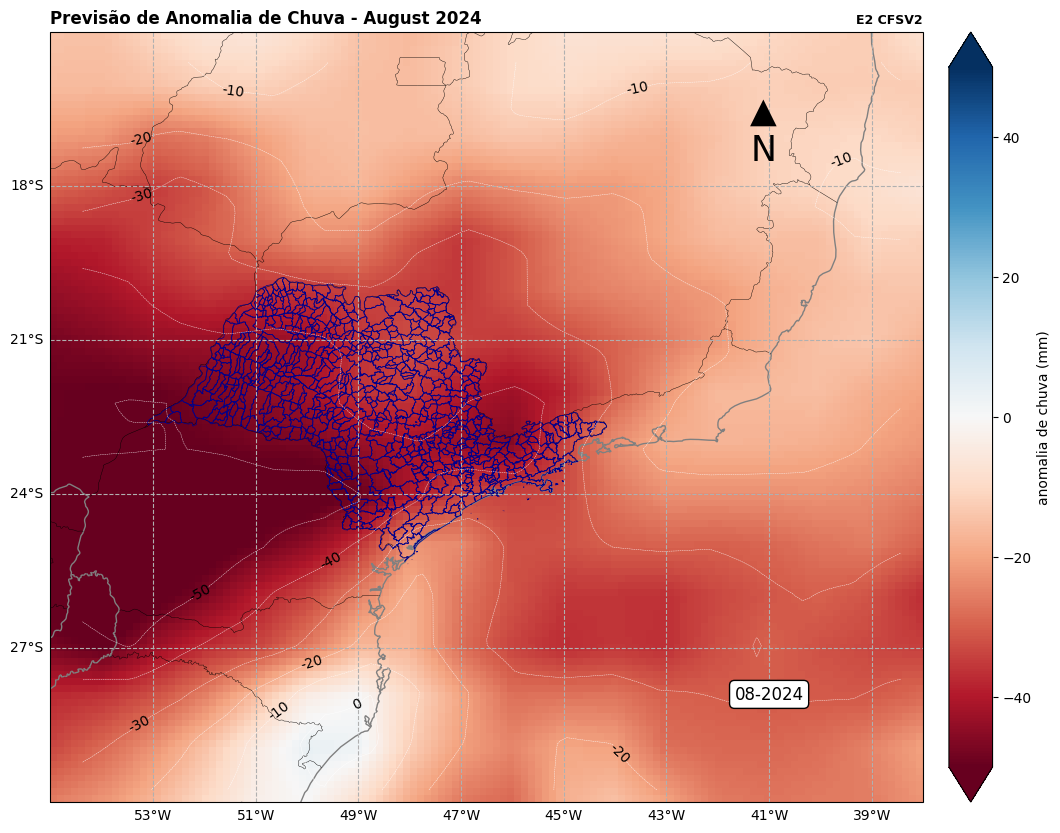

In [12]:
import calendar

import datetime

#for data in lista_data:
for i, data in enumerate(lista_data):
    
    
    # Convertendo a string da data para um objeto datetime
    dt = datetime.datetime.strptime(data, '%d-%m-%Y')
    
    # Obtendo o número de dias no mês usando o módulo calendar
    dias_no_mes = calendar.monthrange(dt.year, dt.month)[1]
    
    # Imprimindo o resultado
    print(f'O mês de {dt.strftime("%B %Y")} tem {dias_no_mes} dias.')
    
    #multiplicar os dias do mês do ano, para saber o volume exato acima da média
    anom= ds['anom']*dias_no_mes

    mes = anom.isel(ens=0, time=i, lev=0)
    display(mes)
    
    #preencher a data bonita no texto
    display(mes.time.data)
    tempo = mes.time.dt.strftime('%d-%m-%Y')
    tempo2 = mes.time.dt.strftime('%m-%Y')

    tempo
    print('data do cfsv2')
    print(tempo.data)
    
    #selecionar o mapa para ficar dentro da área de interesse, no caso o estado de São Paulo
    anom_corte_SP = mes.sel(lat = slice(-30, -15), lon = slice(-55,-38))
    anom_corte_SP
    
    import numpy as np


    #interpolando os dados, para não ficar de forma quadrática os resultados no mapa.
    # Assuming 'lat' and 'lon' are the dimension names, replace them with your actual dimension names
    new_lon = np.linspace(anom_corte_SP.lon[0], anom_corte_SP.lon[-1], anom_corte_SP.sizes["lon"] * 7)
    new_lat = np.linspace(anom_corte_SP.lat[0], anom_corte_SP.lat[-1], anom_corte_SP.sizes["lat"] * 7)


    # Use dimension names instead of string indices
    NEW_anom_corte_SP = anom_corte_SP.interp(lat=new_lat, lon=new_lon)

    #Mapa de interesse
    
    
    import numpy as np
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature
    import cartopy.io.shapereader as shpreader  # Import shapefiles

    # Assume NEW_anom_corte_SP é o seu dado de anomalia de chuva

    # Configura o tamanho do plot
    fig = plt.figure(figsize=(15, 10))

    # Define a projeção
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Adiciona linha de costa, terra, borda
    ax.coastlines(resolution='10m', color='grey')
    ax.add_feature(cartopy.feature.LAND, facecolor='silver')
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='gray')

    # Define a área do plot
    limites = [-55, -38, -30, -15]
    ax.set_extent(limites, crs=ccrs.PlateCarree())

    # Adicionando o dado (assuming NEW_anom_corte_SP is the rainfall anomaly data)
    im = ax.imshow(NEW_anom_corte_SP, origin='lower', extent=limites, vmin=-50, vmax=50, cmap='RdBu')

    #---------- COLOCAR O CONTORNO NO SISTEMA -------------------

    # Define contour levels
    data_min = -50
    data_max = 50
    interval = 10
    levels = np.arange(data_min, data_max, interval)

    
    lons, lats = np.meshgrid(NEW_anom_corte_SP.lon, NEW_anom_corte_SP.lat)
    # Plot contours on top of the image
    contour = ax.contour(lons, lats, NEW_anom_corte_SP, colors='white', linewidths=0.3, levels=levels)
    ax.clabel(contour, inline=1, inline_spacing=0, fontsize=10, fmt='%1.0f', colors='black')
    # Plot contours on top of the image
    #contour = ax.contour(lons, lats, NEW_anom_corte_SP, colors='white', linewidths=0.3, levels=levels, origin='lower')
    #ax.clabel(contour, inline=1, inline_spacing=0, fontsize=10, fmt='%1.0f', colors='black')
    # Plot contours on top of the image
    #contorno havia ficado antes de ponta cabeça (no caso nnme noaa)
   # contour = ax.contour(lons, lats, NEW_anom_corte_SP[::-1, :], colors='white', linewidths=0.3, levels=levels, origin='lower')
   # ax.clabel(contour, inline=1, inline_spacing=0, fontsize=10, fmt='%1.0f', colors='black')
    


    #--------------------------------------------------
    

    # Adicionando título
    plt.title(f'Previsão de Anomalia de Chuva - {dt.strftime("%B %Y")}', fontweight='bold', loc='left')
    plt.title('E2 CFSV2', fontweight='bold', fontsize=9, loc='right')

    # Adicionando os limites dos estados
    shapefile_path = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces_lines')
    shapefile = shpreader.Reader(shapefile_path).geometries()
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

    shapefile = list(shpreader.Reader('SP_municipios/SP_Municipios_2022.shp').geometries())
    #ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.3)
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='darkblue',facecolor='none', linewidth=0.5)

    # Configuração das grades
    gl = ax.gridlines(linestyle='--', xlocs=np.arange(-55, -38, 2), ylocs=np.arange(-30, -15, 3), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

    # Adicionando a barra de cor
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes

    axins = inset_axes(ax, width="5%", height="100%", loc='right', borderpad=-5)
    cbar = fig.colorbar(im, cax=axins, orientation='vertical', label='anomalia de chuva (mm)', extend='both')
    
    # North Arrow
    ax.annotate(u'\u25B2 \nN ', ha='center', fontsize=25, xy=(-41, -17.5))
    
    # Data box
    box = dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    ax.annotate(tempo2.data, ha='center', fontsize=12, xy=(-41, -28), bbox=box)

    plt.savefig(f'Figura_gfsv2_nc/anomalia_csf_contour{i}.png',bbox_inches='tight', dpi=100)
    # Mostra o plot
    plt.show()
    

# Mosaico

In [13]:
import numpy as np
import calendar
import datetime
import numpy as np
import matplotlib.pyplot as plt
import cartopy.feature
import cartopy.io.shapereader as shpreader  # Import shapefiles
import calendar
import datetime

O mês de March 2024 tem 31 dias.


<xarray.DataArray 'anom' (lat: 190, lon: 384)>
array([[ 0.46461317,  0.46407726,  0.47300577, ...,  0.48764712,
         0.47121963,  0.47135383],
       [ 0.32140782,  0.3573878 ,  0.34037974, ...,  0.32310405,
         0.3307377 ,  0.3185509 ],
       [-0.2001212 , -0.20293356, -0.18824688, ..., -0.10490384,
        -0.16021286, -0.16315933],
       ...,
       [-1.5207951 , -1.5416429 , -1.5520439 , ..., -1.577131  ,
        -1.5765052 , -1.5775329 ],
       [-1.4926723 , -1.498386  , -1.4848157 , ..., -1.5044577 ,
        -1.4921372 , -1.4944139 ],
       [-1.6404309 , -1.6210569 , -1.6448499 , ..., -1.6470817 ,
        -1.6386454 , -1.6386452 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
    lev      float32 1.0
    time     datetime64[ns] 2024-03-01
    ens      float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1

array('2024-03-01T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
01-03-2024
O mês de April 2024 tem 30 dias.


<xarray.DataArray 'anom' (lat: 190, lon: 384)>
array([[ 0.99001443,  0.9977902 ,  0.99273616, ...,  0.96690226,
         0.9755856 ,  0.983448  ],
       [ 0.37303194,  0.37177894,  0.39117622, ...,  0.3747601 ,
         0.35367864,  0.3572208 ],
       [ 0.1220832 ,  0.14554058,  0.13763532, ...,  0.09940326,
         0.13283998,  0.1252798 ],
       ...,
       [-0.3833139 , -0.4086718 , -0.3631398 , ..., -0.32909778,
        -0.3592945 , -0.37726587],
       [-0.41441748, -0.43696827, -0.44349056, ..., -0.36011547,
        -0.3660763 , -0.39165118],
       [-0.7260198 , -0.72813624, -0.7299508 , ..., -0.70567256,
        -0.71379447, -0.71124554]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
    lev      float32 1.0
    time     datetime64[ns] 2024-04-01
    ens      float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1

array('2024-04-01T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
01-04-2024
O mês de May 2024 tem 31 dias.


<xarray.DataArray 'anom' (lat: 190, lon: 384)>
array([[ 0.2516361 ,  0.24346651,  0.23833294, ...,  0.27337548,
         0.27676788,  0.2562335 ],
       [-0.0746828 , -0.03972962, -0.03888128, ..., -0.06977233,
        -0.08124491, -0.06856716],
       [-0.32154173, -0.35136133, -0.3626107 , ..., -0.32274738,
        -0.3503792 , -0.3321663 ],
       ...,
       [ 1.7494864 ,  1.7601094 ,  1.7742606 , ...,  1.8108218 ,
         1.7996175 ,  1.783145  ],
       [ 2.2547212 ,  2.2170904 ,  2.2442746 , ...,  2.2490077 ,
         2.2776222 ,  2.236732  ],
       [ 1.5819532 ,  1.5783372 ,  1.6213245 , ...,  1.5782919 ,
         1.5852559 ,  1.5886937 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
    lev      float32 1.0
    time     datetime64[ns] 2024-05-01
    ens      float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1

array('2024-05-01T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
01-05-2024
O mês de June 2024 tem 30 dias.


<xarray.DataArray 'anom' (lat: 190, lon: 384)>
array([[ 0.45791996,  0.4631039 ,  0.4877279 , ...,  0.43403035,
         0.4351968 ,  0.43748653],
       [ 0.22222093,  0.23453271,  0.24200645, ...,  0.2275344 ,
         0.22775047,  0.23885283],
       [-0.07240307, -0.06536177, -0.0597455 , ..., -0.03775671,
        -0.06216469, -0.05387034],
       ...,
       [-1.2729309 , -1.2856328 , -1.2562994 , ..., -1.1661842 ,
        -1.1962094 , -1.2394961 ],
       [-0.95929974, -0.9446112 , -0.948629  , ..., -0.8837862 ,
        -0.9167481 , -0.9350648 ],
       [-0.71966887, -0.7123245 , -0.70126534, ..., -0.7254573 ,
        -0.7125839 , -0.7264511 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
    lev      float32 1.0
    time     datetime64[ns] 2024-06-01
    ens      float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1

array('2024-06-01T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
01-06-2024
O mês de July 2024 tem 31 dias.


<xarray.DataArray 'anom' (lat: 190, lon: 384)>
array([[ 2.7136651e-01,  2.6511735e-01,  2.8011602e-01, ...,
         2.6288518e-01,  2.5002846e-01,  2.7565205e-01],
       [ 1.1289451e-01,  1.0535030e-01,  1.0874304e-01, ...,
         1.2226909e-01,  1.5168677e-01,  1.3820536e-01],
       [ 2.0089271e-03, -2.3525309e-02, -1.2499029e-02, ...,
         3.8167100e-02, -2.9060595e-02,  1.3302722e-02],
       ...,
       [ 3.9024756e+00,  3.9126058e+00,  3.8778327e+00, ...,
         3.7044942e+00,  3.8148463e+00,  3.8263619e+00],
       [ 3.4224596e+00,  3.3883553e+00,  3.3817899e+00, ...,
         3.3248336e+00,  3.3463926e+00,  3.3786211e+00],
       [ 1.9572408e+00,  1.9268826e+00,  1.8757707e+00, ...,
         1.9263952e+00,  1.9315274e+00,  1.9131823e+00]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
    lev      float32 1.0
    time     datetime64[ns] 2024-07-01
    ens      float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1

array('2024-07-01T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
01-07-2024
O mês de August 2024 tem 31 dias.


<xarray.DataArray 'anom' (lat: 190, lon: 384)>
array([[0.2281553 , 0.2547157 , 0.23940456, ..., 0.22619101, 0.2076652 ,
        0.20619209],
       [0.02834667, 0.0685669 , 0.07195962, ..., 0.02816795, 0.04446151,
        0.03294428],
       [0.01490985, 0.01138316, 0.00607104, ..., 0.0088835 , 0.00361585,
        0.03749752],
       ...,
       [1.9385798 , 1.9318421 , 1.9301424 , ..., 1.9967059 , 1.9621038 ,
        1.9501886 ],
       [2.5614433 , 2.586175  , 2.59372   , ..., 2.6655002 , 2.5959513 ,
        2.5883603 ],
       [2.8678503 , 2.8734756 , 2.9017818 , ..., 2.8595488 , 2.8350425 ,
        2.8603504 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
    lev      float32 1.0
    time     datetime64[ns] 2024-08-01
    ens      float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1

array('2024-08-01T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
01-08-2024


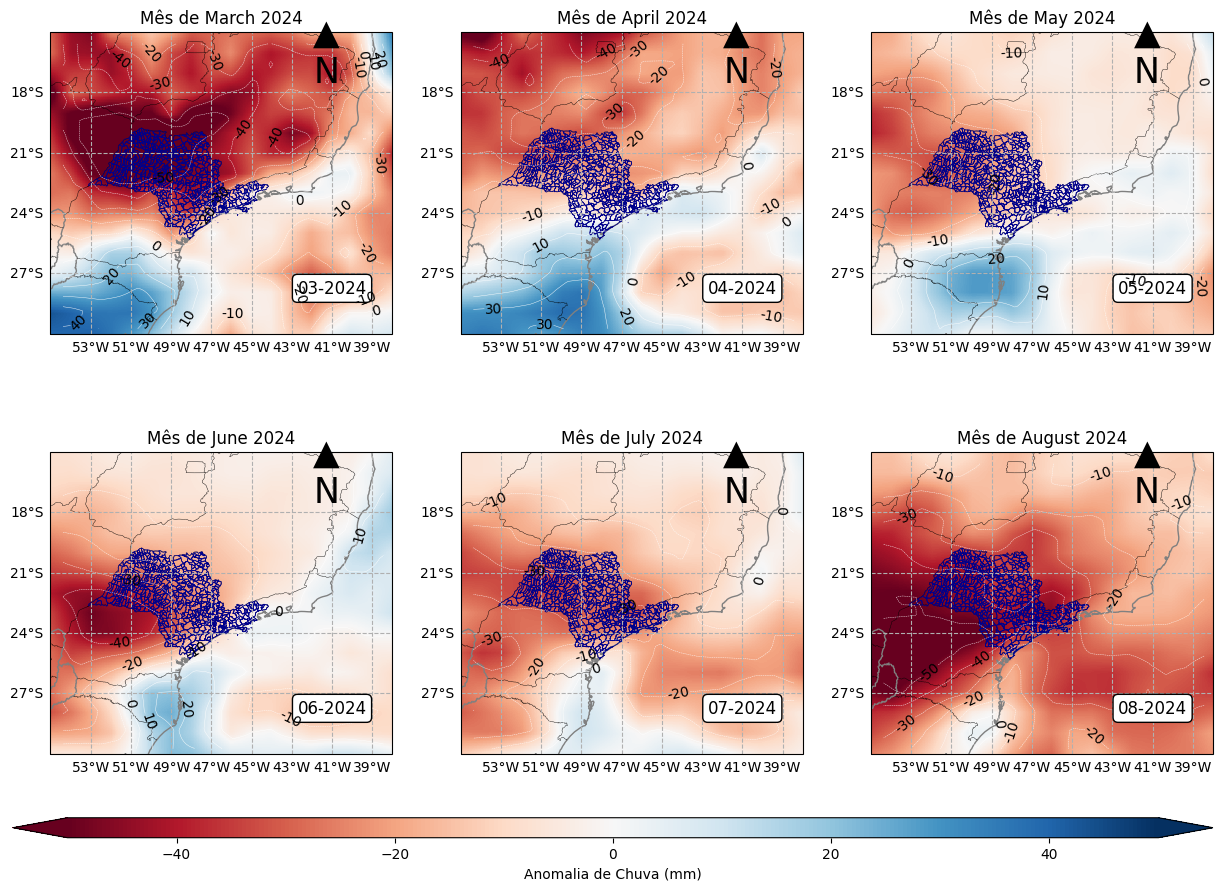

In [14]:

#fig, axs = plt.subplots(nrows=2,ncols=3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(24,17))
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})




# Configura o tamanho do plot
#fig, axs = plt.subplots(nrows=2,ncols=3, len(lista_data), figsize=(15, 5), subplot_kw={'projection': ccrs.PlateCarree()})
i=0
# Itera sobre as datas
for ax, data in zip(axs.flat, lista_data):  # Alteração aqui: uso do zip para iterar sobre axs e lista_data
    # Convertendo a string da data para um objeto datetime
    dt = datetime.datetime.strptime(data, '%d-%m-%Y')
    
    # Obtendo o número de dias no mês usando o módulo calendar
    dias_no_mes = calendar.monthrange(dt.year, dt.month)[1]
    
    
    # Imprimindo o resultado
    print(f'O mês de {dt.strftime("%B %Y")} tem {dias_no_mes} dias.')
    
    #multiplicar os dias do mês do ano, para saber o volume exato acima da média
    anom= ds['anom']*dias_no_mes

    mes = anom.isel(ens=0, time=i, lev=0)
    display(mes)
    
    #preencher a data bonita no texto
    display(mes.time.data)
    tempo = mes.time.dt.strftime('%d-%m-%Y')
    tempo2 = mes.time.dt.strftime('%m-%Y')

    tempo
    print('data do cfsv2')
    print(tempo.data)
    
    #selecionar o mapa para ficar dentro da área de interesse, no caso o estado de São Paulo
    anom_corte_SP = mes.sel(lat = slice(-30, -15), lon = slice(-55,-38))
    anom_corte_SP
    
    # Assuming 'lat' and 'lon' are the dimension names, replace them with your actual dimension names
    new_lon = np.linspace(anom_corte_SP.lon[0], anom_corte_SP.lon[-1], anom_corte_SP.sizes["lon"] * 7)
    new_lat = np.linspace(anom_corte_SP.lat[0], anom_corte_SP.lat[-1], anom_corte_SP.sizes["lat"] * 7)


    # Use dimension names instead of string indices
    NEW_anom_corte_SP = anom_corte_SP.interp(lat=new_lat, lon=new_lon)
    
  # Adiciona linha de costa, terra, borda
    ax.coastlines(resolution='10m', color='grey')  # Corrigido aqui: use 'ax' diretamente
    ax.add_feature(cartopy.feature.LAND, facecolor='silver')
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='gray')

    # Define a área do plot
    limites = [-55, -38, -30, -15]
    ax.set_extent(limites, crs=ccrs.PlateCarree())

    # Adicionando o dado (assuming NEW_anom_corte_SP is the rainfall anomaly data)
    im = ax.imshow(NEW_anom_corte_SP, origin='lower', extent=limites, vmin=-50, vmax=50, cmap='RdBu')


    #---------- COLOCAR O CONTORNO NO SISTEMA -------------------

    # Define contour levels
    data_min = -50
    data_max = 50
    interval = 10
    levels = np.arange(data_min, data_max, interval)

    
    lons, lats = np.meshgrid(NEW_anom_corte_SP.lon, NEW_anom_corte_SP.lat)
    # Plot contours on top of the image
    contour = ax.contour(lons, lats, NEW_anom_corte_SP, colors='white', linewidths=0.3, levels=levels)
    ax.clabel(contour, inline=1, inline_spacing=0, fontsize=10, fmt='%1.0f', colors='black')

    #------------------------------------------------------
    
    # Adicionando título
   # ax.set_title(f'Previsão de Anomalia de Chuva - {dt.strftime("%B %Y")}', fontweight='bold', loc='left')
    #ax.set_title('E2 CFSV2', fontweight='bold', fontsize=9, loc='right')
    # Adiciona título
    ax.set_title(f'Mês de {dt.strftime("%B %Y")}')

    # Adicionando os limites dos estados
    shapefile_path = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces_lines')
    shapefile = shpreader.Reader(shapefile_path).geometries()
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

    shapefile = list(shpreader.Reader('SP_municipios/SP_Municipios_2022.shp').geometries())
    #ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.3)
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='darkblue',facecolor='none', linewidth=0.5)

    # Configuração das grades
    gl = ax.gridlines(linestyle='--', xlocs=np.arange(-55, -38, 2), ylocs=np.arange(-30, -15, 3), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    # North Arrow
    ax.annotate(u'\u25B2 \nN ', ha='center', fontsize=25, xy=(-41, -17.5))
    
    # Data box
    box = dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    ax.annotate(tempo2.data, ha='center', fontsize=12, xy=(-41, -28), bbox=box)
        
    i=i+1
    
    
# Adiciona a barra de cor (assumindo que você já tem a variável im definida)
cax = fig.add_axes([0.1, 0.05, 0.8, 0.02])

#cax = fig.add_axes([0.1, -0.1, 0.8, 0.02])

#[left, bottom, width, height]
cbar = fig.colorbar(im, cax=cax, orientation='horizontal', label='Anomalia de Chuva (mm)', extend='both')    
    

# Adiciona a barra de cor (assumindo que você já tem a variável im definida)
#cax = fig.add_axes([0.1, 0.1, 0.8, 0.02])

#cax = fig.add_axes([0.1, -0.1, 0.8, 0.02])

#[left, bottom, width, height]
#cbar = fig.colorbar(im, cax=cax, orientation='horizontal', label='Anomalia de Chuva (mm)', extend='both')

#plt.show()

O mês de March 2024 tem 31 dias.


<xarray.DataArray 'anom' (lat: 190, lon: 384)>
array([[ 0.46461317,  0.46407726,  0.47300577, ...,  0.48764712,
         0.47121963,  0.47135383],
       [ 0.32140782,  0.3573878 ,  0.34037974, ...,  0.32310405,
         0.3307377 ,  0.3185509 ],
       [-0.2001212 , -0.20293356, -0.18824688, ..., -0.10490384,
        -0.16021286, -0.16315933],
       ...,
       [-1.5207951 , -1.5416429 , -1.5520439 , ..., -1.577131  ,
        -1.5765052 , -1.5775329 ],
       [-1.4926723 , -1.498386  , -1.4848157 , ..., -1.5044577 ,
        -1.4921372 , -1.4944139 ],
       [-1.6404309 , -1.6210569 , -1.6448499 , ..., -1.6470817 ,
        -1.6386454 , -1.6386452 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
    lev      float32 1.0
    time     datetime64[ns] 2024-03-01
    ens      float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1

array('2024-03-01T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
01-03-2024
O mês de April 2024 tem 30 dias.


<xarray.DataArray 'anom' (lat: 190, lon: 384)>
array([[ 0.99001443,  0.9977902 ,  0.99273616, ...,  0.96690226,
         0.9755856 ,  0.983448  ],
       [ 0.37303194,  0.37177894,  0.39117622, ...,  0.3747601 ,
         0.35367864,  0.3572208 ],
       [ 0.1220832 ,  0.14554058,  0.13763532, ...,  0.09940326,
         0.13283998,  0.1252798 ],
       ...,
       [-0.3833139 , -0.4086718 , -0.3631398 , ..., -0.32909778,
        -0.3592945 , -0.37726587],
       [-0.41441748, -0.43696827, -0.44349056, ..., -0.36011547,
        -0.3660763 , -0.39165118],
       [-0.7260198 , -0.72813624, -0.7299508 , ..., -0.70567256,
        -0.71379447, -0.71124554]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
    lev      float32 1.0
    time     datetime64[ns] 2024-04-01
    ens      float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1

array('2024-04-01T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
01-04-2024
O mês de May 2024 tem 31 dias.


<xarray.DataArray 'anom' (lat: 190, lon: 384)>
array([[ 0.2516361 ,  0.24346651,  0.23833294, ...,  0.27337548,
         0.27676788,  0.2562335 ],
       [-0.0746828 , -0.03972962, -0.03888128, ..., -0.06977233,
        -0.08124491, -0.06856716],
       [-0.32154173, -0.35136133, -0.3626107 , ..., -0.32274738,
        -0.3503792 , -0.3321663 ],
       ...,
       [ 1.7494864 ,  1.7601094 ,  1.7742606 , ...,  1.8108218 ,
         1.7996175 ,  1.783145  ],
       [ 2.2547212 ,  2.2170904 ,  2.2442746 , ...,  2.2490077 ,
         2.2776222 ,  2.236732  ],
       [ 1.5819532 ,  1.5783372 ,  1.6213245 , ...,  1.5782919 ,
         1.5852559 ,  1.5886937 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
    lev      float32 1.0
    time     datetime64[ns] 2024-05-01
    ens      float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1

array('2024-05-01T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
01-05-2024
O mês de June 2024 tem 30 dias.


<xarray.DataArray 'anom' (lat: 190, lon: 384)>
array([[ 0.45791996,  0.4631039 ,  0.4877279 , ...,  0.43403035,
         0.4351968 ,  0.43748653],
       [ 0.22222093,  0.23453271,  0.24200645, ...,  0.2275344 ,
         0.22775047,  0.23885283],
       [-0.07240307, -0.06536177, -0.0597455 , ..., -0.03775671,
        -0.06216469, -0.05387034],
       ...,
       [-1.2729309 , -1.2856328 , -1.2562994 , ..., -1.1661842 ,
        -1.1962094 , -1.2394961 ],
       [-0.95929974, -0.9446112 , -0.948629  , ..., -0.8837862 ,
        -0.9167481 , -0.9350648 ],
       [-0.71966887, -0.7123245 , -0.70126534, ..., -0.7254573 ,
        -0.7125839 , -0.7264511 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
    lev      float32 1.0
    time     datetime64[ns] 2024-06-01
    ens      float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1

array('2024-06-01T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
01-06-2024
O mês de July 2024 tem 31 dias.


<xarray.DataArray 'anom' (lat: 190, lon: 384)>
array([[ 2.7136651e-01,  2.6511735e-01,  2.8011602e-01, ...,
         2.6288518e-01,  2.5002846e-01,  2.7565205e-01],
       [ 1.1289451e-01,  1.0535030e-01,  1.0874304e-01, ...,
         1.2226909e-01,  1.5168677e-01,  1.3820536e-01],
       [ 2.0089271e-03, -2.3525309e-02, -1.2499029e-02, ...,
         3.8167100e-02, -2.9060595e-02,  1.3302722e-02],
       ...,
       [ 3.9024756e+00,  3.9126058e+00,  3.8778327e+00, ...,
         3.7044942e+00,  3.8148463e+00,  3.8263619e+00],
       [ 3.4224596e+00,  3.3883553e+00,  3.3817899e+00, ...,
         3.3248336e+00,  3.3463926e+00,  3.3786211e+00],
       [ 1.9572408e+00,  1.9268826e+00,  1.8757707e+00, ...,
         1.9263952e+00,  1.9315274e+00,  1.9131823e+00]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
    lev      float32 1.0
    time     datetime64[ns] 2024-07-01
    ens      float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1

array('2024-07-01T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
01-07-2024
O mês de August 2024 tem 31 dias.


<xarray.DataArray 'anom' (lat: 190, lon: 384)>
array([[0.2281553 , 0.2547157 , 0.23940456, ..., 0.22619101, 0.2076652 ,
        0.20619209],
       [0.02834667, 0.0685669 , 0.07195962, ..., 0.02816795, 0.04446151,
        0.03294428],
       [0.01490985, 0.01138316, 0.00607104, ..., 0.0088835 , 0.00361585,
        0.03749752],
       ...,
       [1.9385798 , 1.9318421 , 1.9301424 , ..., 1.9967059 , 1.9621038 ,
        1.9501886 ],
       [2.5614433 , 2.586175  , 2.59372   , ..., 2.6655002 , 2.5959513 ,
        2.5883603 ],
       [2.8678503 , 2.8734756 , 2.9017818 , ..., 2.8595488 , 2.8350425 ,
        2.8603504 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.28 -88.34 -87.4 -86.45 ... 86.45 87.4 88.34 89.28
    lev      float32 1.0
    time     datetime64[ns] 2024-08-01
    ens      float32 1.0
  * lon      (lon) float32 -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1

array('2024-08-01T00:00:00.000000000', dtype='datetime64[ns]')

data do cfsv2
01-08-2024


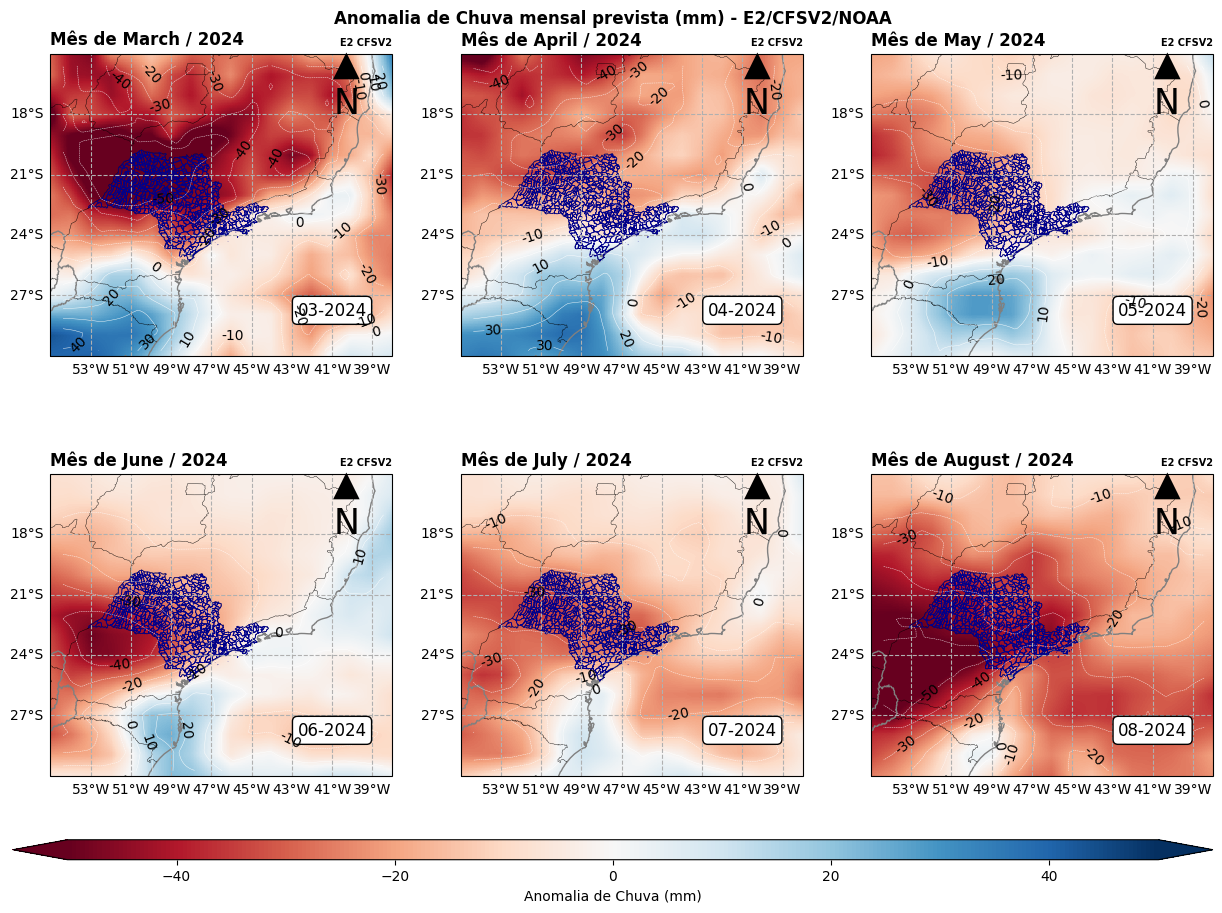

In [15]:

#fig, axs = plt.subplots(nrows=2,ncols=3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(24,17))
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})




# Configura o tamanho do plot
#fig, axs = plt.subplots(nrows=2,ncols=3, len(lista_data), figsize=(15, 5), subplot_kw={'projection': ccrs.PlateCarree()})
i=0
# Itera sobre as datas
for ax, data in zip(axs.flat, lista_data):  # Alteração aqui: uso do zip para iterar sobre axs e lista_data
    # Convertendo a string da data para um objeto datetime
    dt = datetime.datetime.strptime(data, '%d-%m-%Y')
    
    # Obtendo o número de dias no mês usando o módulo calendar
    dias_no_mes = calendar.monthrange(dt.year, dt.month)[1]
    
    
    # Imprimindo o resultado
    print(f'O mês de {dt.strftime("%B %Y")} tem {dias_no_mes} dias.')
    
    #multiplicar os dias do mês do ano, para saber o volume exato acima da média
    anom= ds['anom']*dias_no_mes

    mes = anom.isel(ens=0, time=i, lev=0)
    display(mes)
    
    #preencher a data bonita no texto
    display(mes.time.data)
    tempo = mes.time.dt.strftime('%d-%m-%Y')
    tempo2 = mes.time.dt.strftime('%m-%Y')

    tempo
    print('data do cfsv2')
    print(tempo.data)
    
    #selecionar o mapa para ficar dentro da área de interesse, no caso o estado de São Paulo
    anom_corte_SP = mes.sel(lat = slice(-30, -15), lon = slice(-55,-38))
    anom_corte_SP
    
    # Assuming 'lat' and 'lon' are the dimension names, replace them with your actual dimension names
    #Interpolation of data /interpolação dos dados
    new_lon = np.linspace(anom_corte_SP.lon[0], anom_corte_SP.lon[-1], anom_corte_SP.sizes["lon"] * 7)
    new_lat = np.linspace(anom_corte_SP.lat[0], anom_corte_SP.lat[-1], anom_corte_SP.sizes["lat"] * 7)


    # Use dimension names instead of string indices
    NEW_anom_corte_SP = anom_corte_SP.interp(lat=new_lat, lon=new_lon)
    
  # Adiciona linha de costa, terra, borda
    ax.coastlines(resolution='10m', color='grey')  # Corrigido aqui: use 'ax' diretamente
    ax.add_feature(cartopy.feature.LAND, facecolor='silver')
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='gray')

    # Define a área do plot
    limites = [-55, -38, -30, -15]
    ax.set_extent(limites, crs=ccrs.PlateCarree())

    # Adicionando o dado (assuming NEW_anom_corte_SP is the rainfall anomaly data)
    im = ax.imshow(NEW_anom_corte_SP, origin='lower', extent=limites, vmin=-50, vmax=50, cmap='RdBu')

   #---------- COLOCAR O CONTORNO NO SISTEMA -------------------

    # Define contour levels
    data_min = -50
    data_max = 50
    interval = 10
    levels = np.arange(data_min, data_max, interval)

    
    lons, lats = np.meshgrid(NEW_anom_corte_SP.lon, NEW_anom_corte_SP.lat)
    # Plot contours on top of the image
    contour = ax.contour(lons, lats, NEW_anom_corte_SP, colors='white', linewidths=0.3, levels=levels)
    ax.clabel(contour, inline=1, inline_spacing=0, fontsize=10, fmt='%1.0f', colors='black')

    #------------------------------------------------------

    
    # Adicionando título
   # ax.set_title(f'Previsão de Anomalia de Chuva - {dt.strftime("%B %Y")}', fontweight='bold', loc='left')
    #ax.set_title('E2 CFSV2', fontweight='bold', fontsize=9, loc='right')
    # Adiciona título
    ax.set_title(f'Mês de {dt.strftime("%B / %Y")}',fontweight='bold', loc='left')
    # Adicionando título
    #ax.set_title(f'Previsão de Anomalia de Chuva', fontweight='bold', loc='left')
    ax.set_title('E2 CFSV2', fontweight='bold', fontsize=7, loc='right')
    
    
    # Adicionando os limites dos estados
    shapefile_path = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces_lines')
    shapefile = shpreader.Reader(shapefile_path).geometries()
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

    shapefile = list(shpreader.Reader('SP_municipios/SP_Municipios_2022.shp').geometries())
    #ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.3)
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='darkblue',facecolor='none', linewidth=0.5)

    # Configuração das grades
    gl = ax.gridlines(linestyle='--', xlocs=np.arange(-55, -38, 2), ylocs=np.arange(-30, -15, 3), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    # North Arrow
    ax.annotate(u'\u25B2 \nN ', ha='center', fontsize=25, xy=(-40, -18.0))
    
    # Data box
    box = dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    ax.annotate(tempo2.data, ha='center', fontsize=12, xy=(-41, -28), bbox=box)
        
    i=i+1
    
fig.suptitle('Anomalia de Chuva mensal prevista (mm) - E2/CFSV2/NOAA',fontweight='bold', y=0.90)    
# Adiciona a barra de cor (assumindo que você já tem a variável im definida)
cax = fig.add_axes([0.1, 0.05, 0.8, 0.02])

#cax = fig.add_axes([0.1, -0.1, 0.8, 0.02])

#[left, bottom, width, height]
cbar = fig.colorbar(im, cax=cax, orientation='horizontal', label='Anomalia de Chuva (mm)', extend='both')    
    

# Adiciona a barra de cor (assumindo que você já tem a variável im definida)
#cax = fig.add_axes([0.1, 0.1, 0.8, 0.02])

#cax = fig.add_axes([0.1, -0.1, 0.8, 0.02])

#[left, bottom, width, height]
#cbar = fig.colorbar(im, cax=cax, orientation='horizontal', label='Anomalia de Chuva (mm)', extend='both')
plt.savefig('Figura_gfsv2_nc/figs_anomalia_loop.png',bbox_inches='tight', dpi=100)

Março de 2024

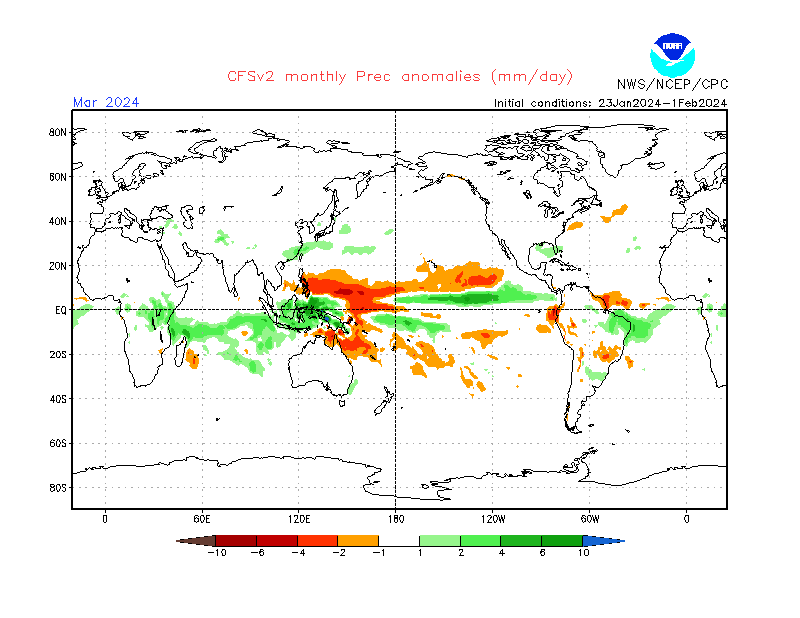



Agosto de 2024

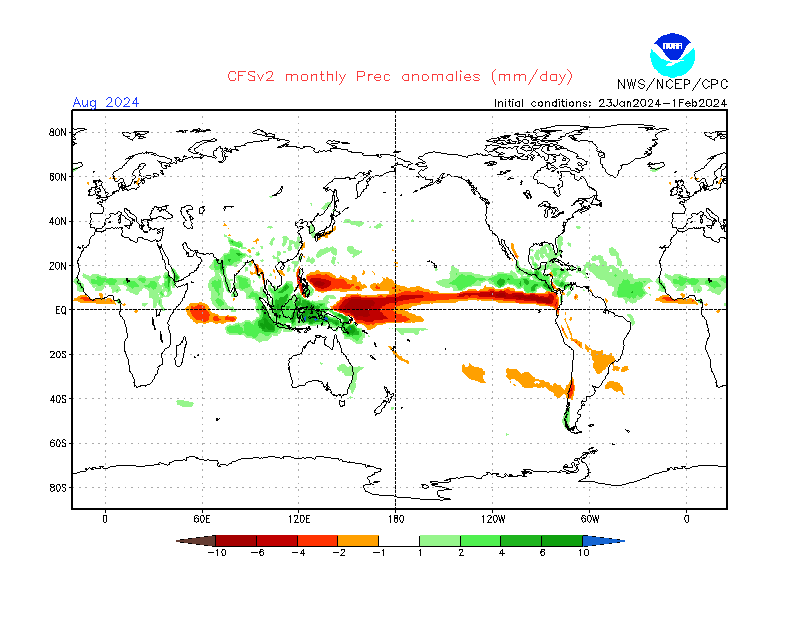

